In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Tips
https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [104]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Total bills

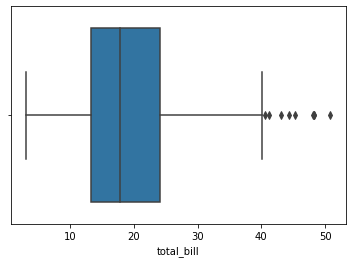

In [105]:
ax = sns.boxplot(x=tips["total_bill"]);

# Draw a vertical boxplot grouped by a categorical variable:

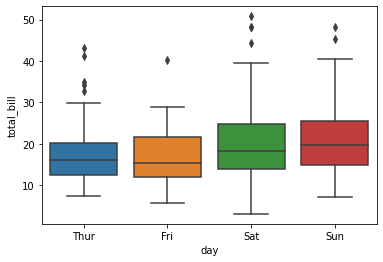

In [106]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

# Draw a boxplot with nested grouping by two categorical variables:

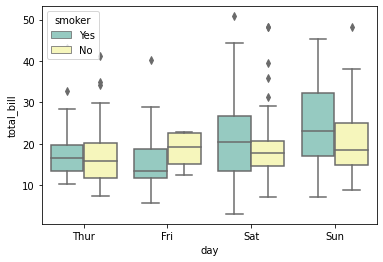

In [107]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

# Draw a boxplot with nested grouping when some bins are empty:

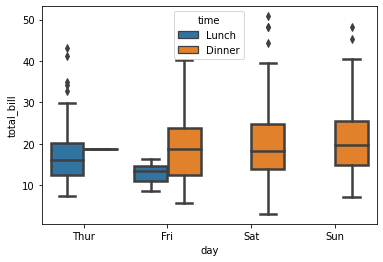

In [108]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                 data=tips, linewidth=2.5)


# Control box order by passing an explicit order:¶

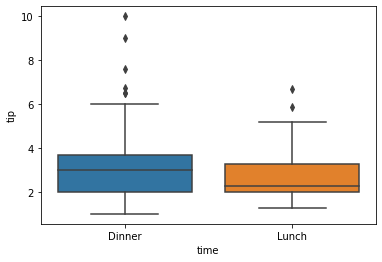

In [109]:
ax = sns.boxplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

# Use hue without changing box position or width:


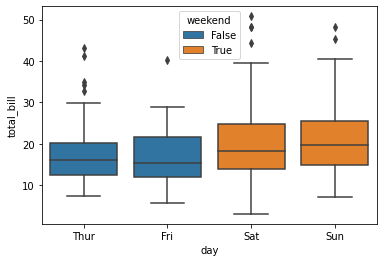

In [111]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.boxplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

# Use swarmplot( ) to show the datapoints on top of the boxes:

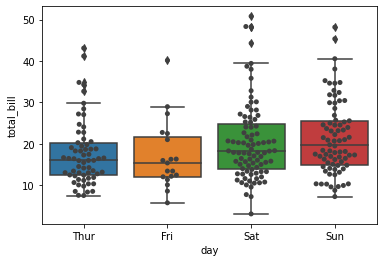

In [112]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

# Use catplot() to combine a boxplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

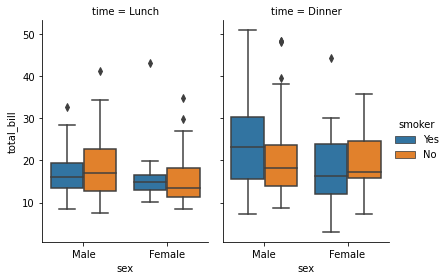

In [113]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);

# Draw a set of vertical bar plots grouped by a categorical variable

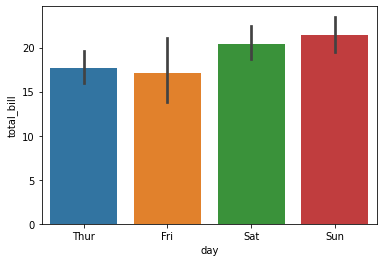

In [114]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

# Draw a set of vertical bars with nested grouping by a two variables:

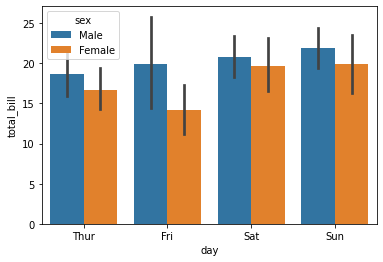

In [115]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

# Draw a set of horizontal bars:

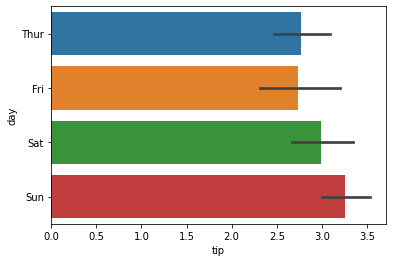

In [116]:
ax = sns.barplot(x="tip", y="day", data=tips)


# Control bar order by passing an explicit order:

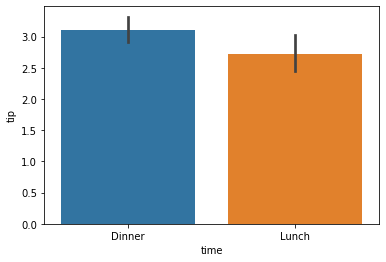

In [117]:
ax = sns.barplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

# Use median as the estimate of central tendency:

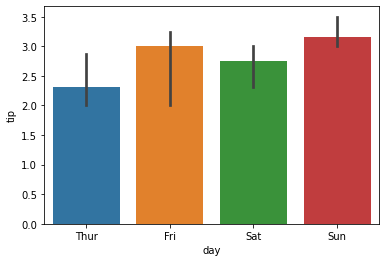

In [118]:
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)

# Show the standard error of the mean with the error bars:

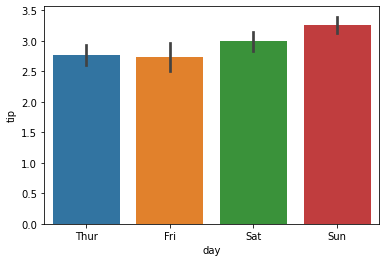

In [119]:
ax = sns.barplot(x="day", y="tip", data=tips, ci=68)

# Show standard deviation of observations instead of a confidence interval:

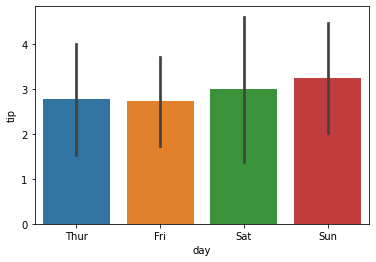

In [120]:
ax = sns.barplot(x="day", y="tip", data=tips, ci="sd")

# Add “caps” to the error bars:

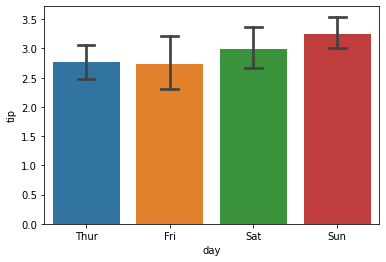

In [121]:
ax = sns.barplot(x="day", y="tip", data=tips, capsize=.2)

# Use a different color palette for the bars:

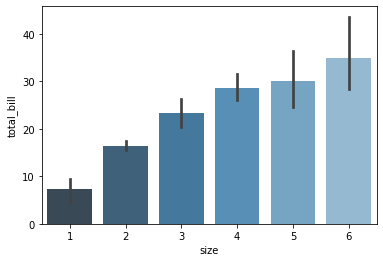

In [122]:
ax = sns.barplot(x="size", y="total_bill", data=tips,
                 palette="Blues_d")

# Use hue without changing bar position or width:


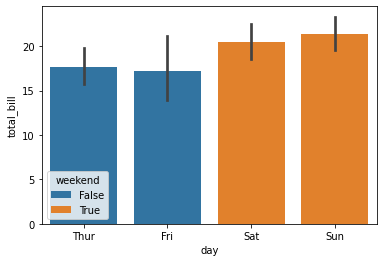

In [123]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

# Plot all bars in a single color:

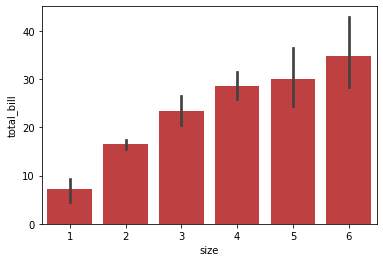

In [124]:
ax = sns.barplot(x="size", y="total_bill", data=tips,
                 color="red", saturation=.5)

# Use matplotlib.axes.Axes.bar() parameters to control the style.

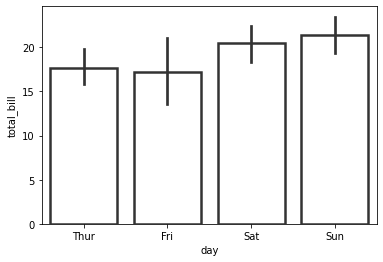

In [125]:
ax = sns.barplot(x="day", y="total_bill", data=tips,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")


# Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:¶


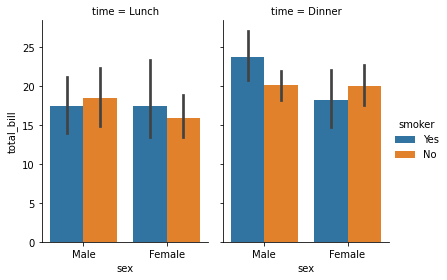

In [126]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

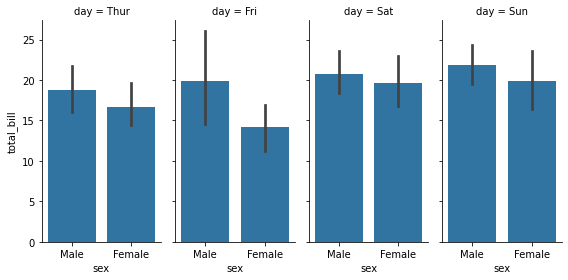

In [128]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"]);

# Draw a boxplot for each numeric variable in a DataFrame:

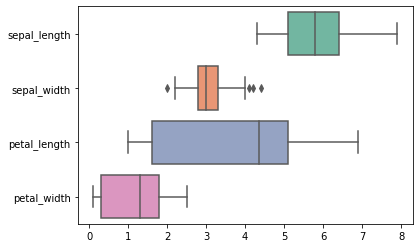

In [110]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

# Causes of Death

In [7]:
import os

In [170]:
df = pd.read_csv('../../../data/causes_of_death.tsv', delimiter = '\t')
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


# Let's look at Gender column

In [71]:
df['Gender'].value_counts(normalize=True)

Male      0.5113
Female    0.4887
Name: Gender, dtype: float64

+ %51% are Male and 48% are female

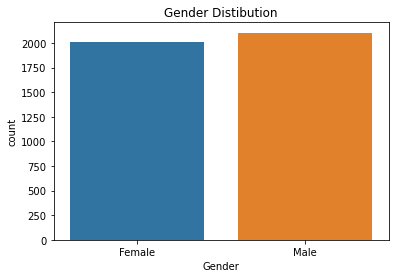

In [74]:
# Plot for the above
sns.countplot(df['Gender'])
fig = plt.gcf()
plt.title('Gender Distibution')
plt.show()

# Plot the above distribution with a Pie Chart

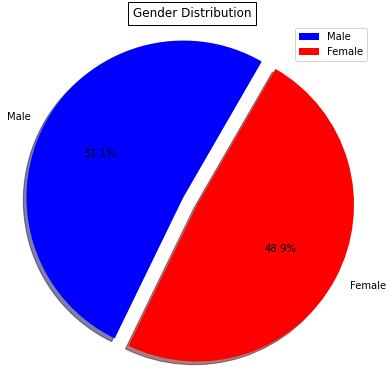

In [72]:

gen_val = ["Male","Female"]
gender = df["Gender"].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title("Gender Distribution" , bbox = {"facecolor":"white" , "pad":5})
labels = "Male" , "Female"
colors = ["blue" , "red"]
explode = (0.1, 0)
plt.pie(gender, explode=explode, labels=labels , colors=colors , 
        autopct = "%1.1f%%" , shadow= True,startangle=60)
plt.legend(labels = gen_val)
plt.axis("equal")
plt.show()

## Let's have a look at our States

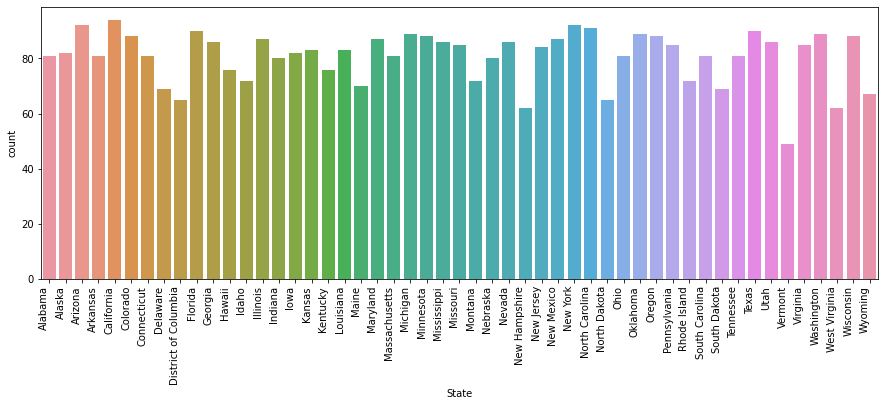

In [73]:
plt.subplots(figsize=(15,5))
s=sns.countplot(df.State)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

### 1) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

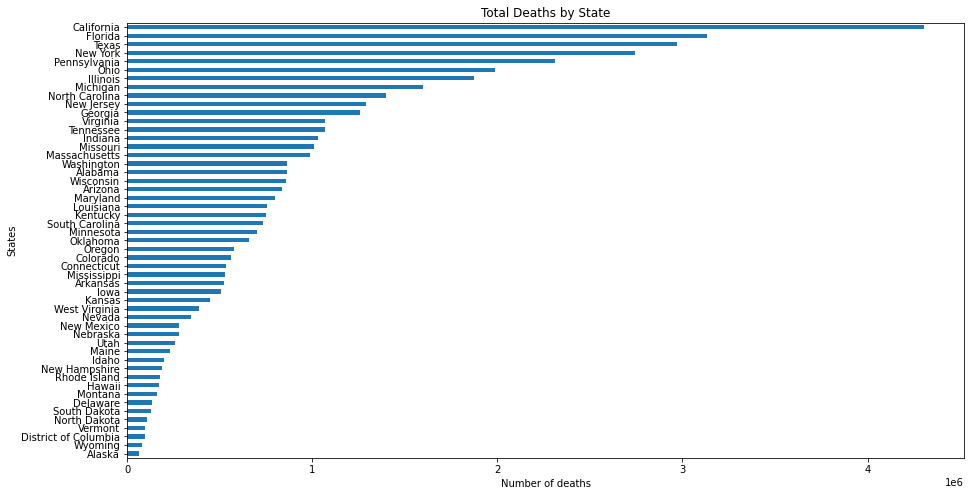

In [56]:
df.groupby(['State'])['Deaths'].sum().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Total Deaths by State')
plt.xlabel('Number of deaths')
plt.ylabel('States')
plt.show()

### 2) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the Mean Population by State.

In [60]:
df['Population'].dtypes

dtype('O')

In [62]:
to_drop = df[df['Population'] == 'Not Applicable']
df.drop(to_drop.index, axis=0 , inplace=True)

In [63]:
# Let's convert population to integers as its an object at this moment
df['Population'] = df['Population'].map(lambda x: int(x))

Text(0, 0.5, 'States')

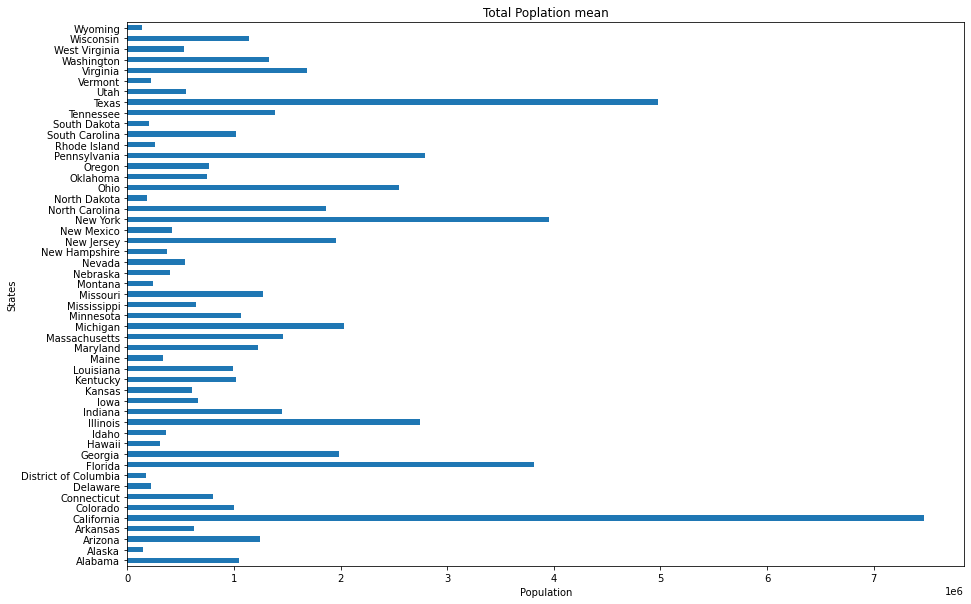

In [64]:
df.groupby(['State'])['Population'].mean().plot(kind='barh', figsize=(15,10))
plt.title('Total Poplation mean')
plt.xlabel('Population')
plt.ylabel('States')

## Kiva Loans Data

In [19]:
# Load in kiva_loans.csv as df
data = pd.read_csv("../../data/kiva_loans.csv")
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Load in the themes data as themes

In [21]:
themes = "./../data/loan_theme_ids.csv"
themes

'./../data/loan_theme_ids.csv'

In [23]:
themes = pd.read_csv('../../data/loan_theme_ids.csv')
themes.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


# Merge the themes file with the data file

In [24]:
merger = pd.merge(data, themes, on='id')
merger.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
1,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0
2,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0


# Let's Look at the countires in the dataframe

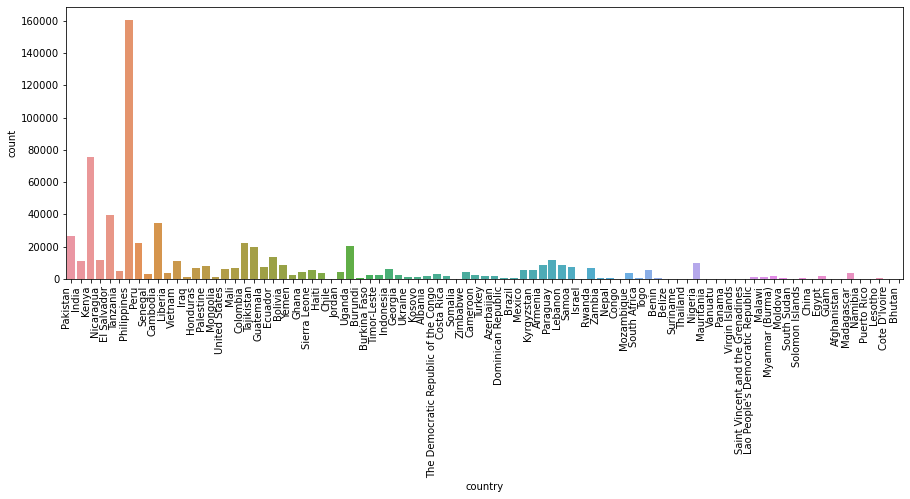

In [87]:
plt.subplots(figsize=(15,5))
s=sns.countplot(merger.country)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

# Let's Choose USA as the country we want to look at

In [88]:
df_usa = merger[merger['country'] == 'United States']

# Show the counts of observations in each categorical bin using bars.

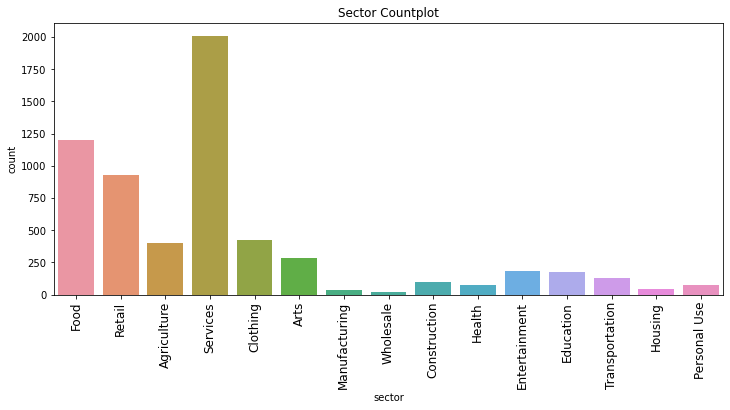

In [89]:
plt.figure(figsize=(12,5)) # Create a new figure
plt.title('Sector Countplot')
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x='sector',data= df_usa)
plt.show()

# Violin plot

 + A violinplot shows the distribution of quantitative data across several 
 levels of one categorical variables such that those distributions can be compared

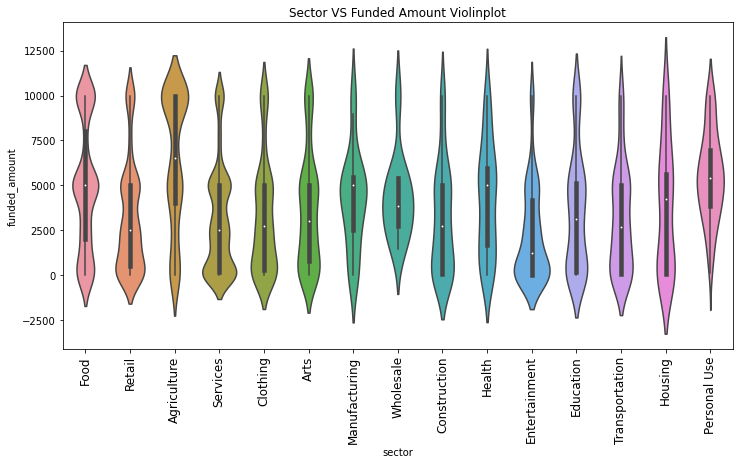

In [90]:
plt.figure(figsize=(12,6)) # Create a new figure
plt.title('Sector VS Funded Amount Violinplot')
plt.xticks(rotation=90,fontsize=12)
sns.violinplot(x='sector',y='funded_amount',data=df_usa);

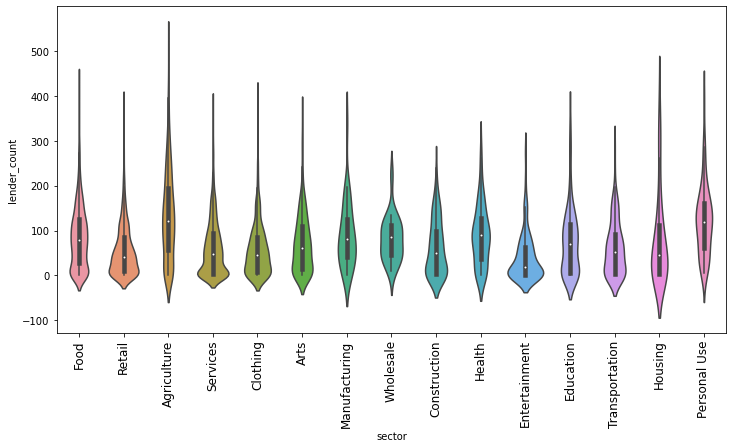

In [92]:
plt.figure(figsize=(12,6)) # Create a new figure
plt.xticks(rotation=90,fontsize=12)
sns.violinplot(x='sector',y='lender_count',data=df_usa);

# Boxplot

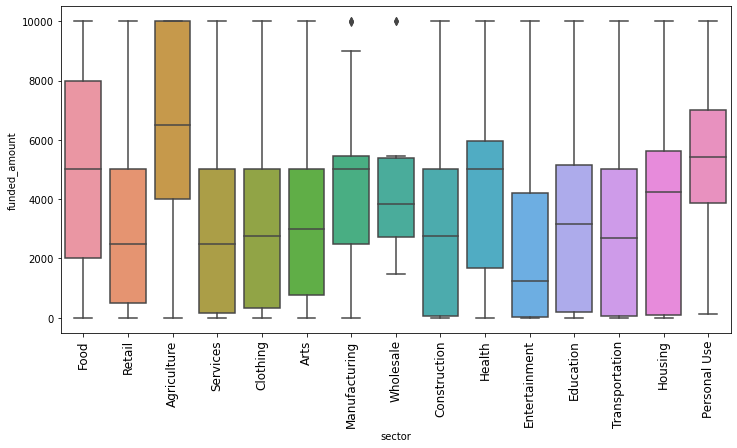

In [93]:
# Distribution of funded amount within sectors
plt.figure(figsize=(12,6)) # Create a new figure
plt.xticks(rotation=90,fontsize=12)
sns.boxplot(x="sector", y="funded_amount", data=df_usa);

In [ ]:
# Top Regions with the highest amount of loans

Top Cities 15 with the highest amount of loans


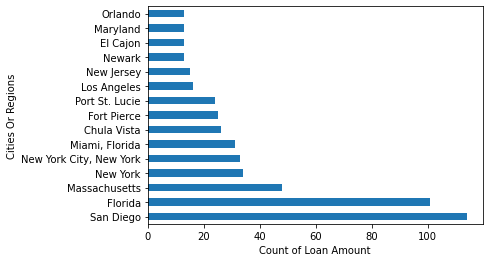

In [99]:
df_usa['region'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Count of Loan Amount')
plt.ylabel('Cities Or Regions')
print("Top Cities 15 with the highest amount of loans")

# We can improve on the above this way

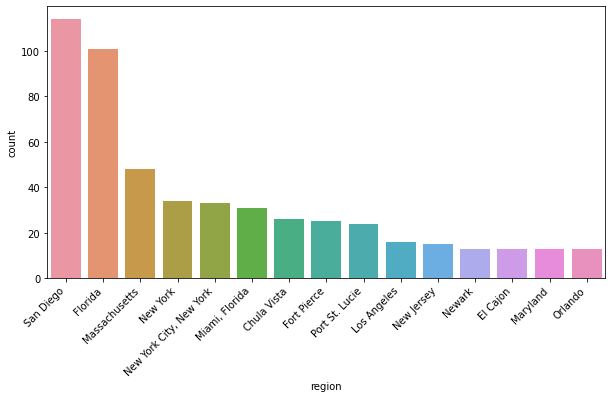

In [102]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x= "region" ,data = df_usa, 
              order = df_usa['region'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

# Chocolate Flavours

In [130]:
path = '../../../data/flavors_of_cacao.csv'  # this is the location of my data in my directory
data = pd.read_csv(path)
data.head()

col_names = ["Company",
"Bean_Origin",
"REF",
"Review_Date",
"Cocoa_Percent",
"Company_Location",
"Rating",
"Bean_Type",
"Broad_Bean_Origin"]

choco_data = pd.read_csv(path , names = col_names , header=0)
choco_data.head()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [131]:
# Check the shape of the DataFrame
print('Chocolate Data - rows:' , choco_data.shape[0],'columns:', choco_data.shape[1])

Chocolate Data - rows: 1795 columns: 9


In [133]:
# Checking missing data
print("There is {} missing values in the dataframe".format(choco_data.isnull().sum().sum()))

There is 2 missing values in the dataframe


In [134]:
choco_data.dropna(inplace=True)

# Top 15 Cocoa companies

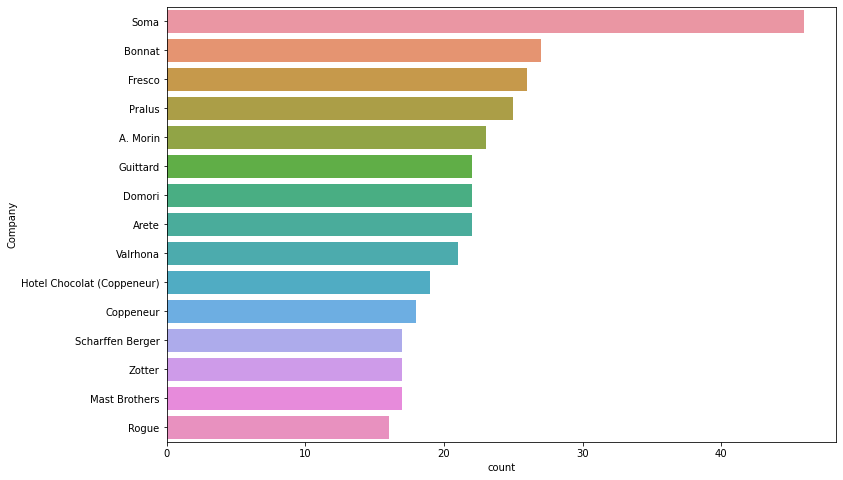

In [136]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Company", data = choco_data, order = choco_data['Company'].value_counts().iloc[:15].index)
plt.show()

In [137]:
choco_data.Company.nunique()

416

+ Observation :

There are 416 Companies in total in our data and the above viz shows the top 15

# Top 15 Cocoa Bean Origin

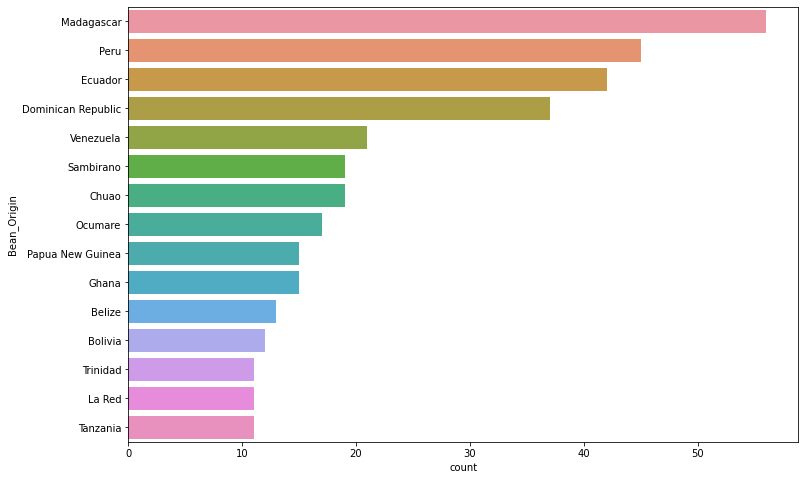

In [138]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Bean_Origin", data=choco_data, order=choco_data['Bean_Origin'].value_counts().iloc[:15].index)
plt.show()

# Top 15 Bean Types

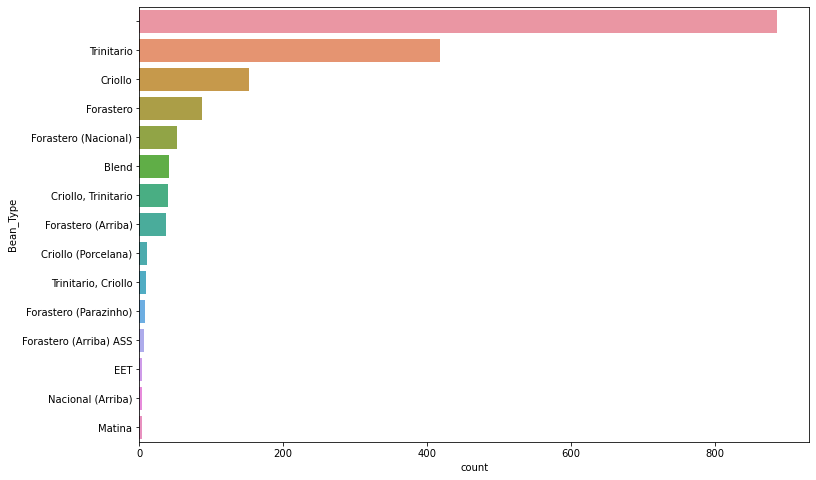

In [139]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Bean_Type", data = choco_data, order = choco_data['Bean_Type'].value_counts().iloc[:15].index)
plt.show()

# Count of Broad Beans Origin on their total working years

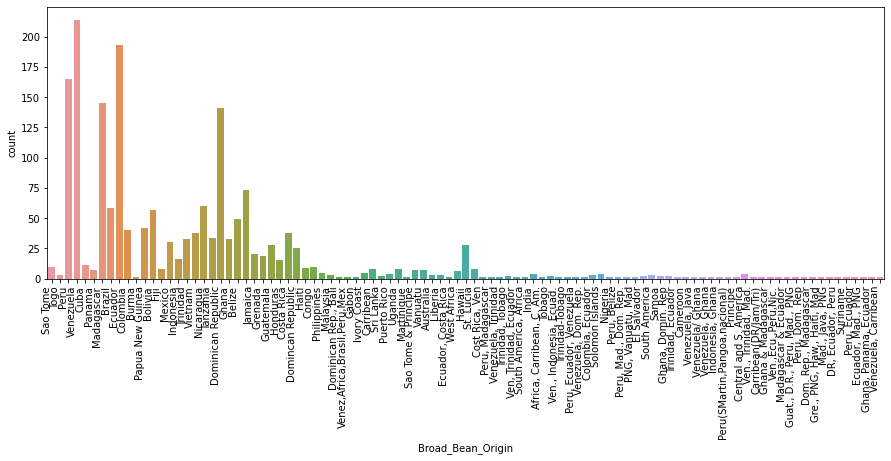

In [140]:
plt.subplots(figsize=(15,5))
s=sns.countplot(choco_data.Broad_Bean_Origin)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

# What is given by the chocolate rating?
The dataset description says...

+ Unpleasant (Mostly unpalatable)
+ Disappointing
+ Satisfactory (3) to praiseworthy (3.5)
+ Premium
+ Elite

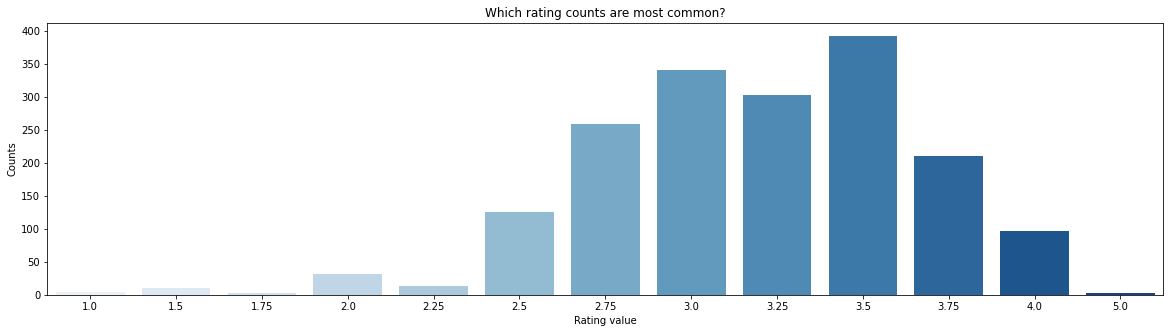

In [141]:
rating_counts = choco_data.Rating.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Which rating counts are most common?");

# Create a Pie Chart to show Chocolate ratings

In [142]:
satisfactory = choco_data[(choco_data["Rating"] >=3) & (choco_data["Rating"] <4)]
unsatisfactory = choco_data[choco_data["Rating"] <3]
highly_satisfactory = choco_data[choco_data["Rating"] >=4]

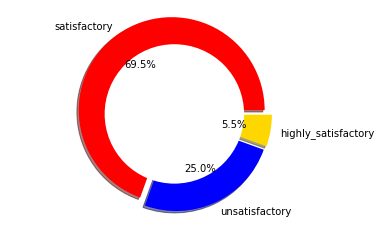

In [143]:
labels = ["satisfactory","unsatisfactory","highly_satisfactory"]
sizes = [len(satisfactory), len(unsatisfactory), len(highly_satisfactory)]
colors = ["red","blue","gold"]
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%" , shadow=True)
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.show()

# What bean types do we have?

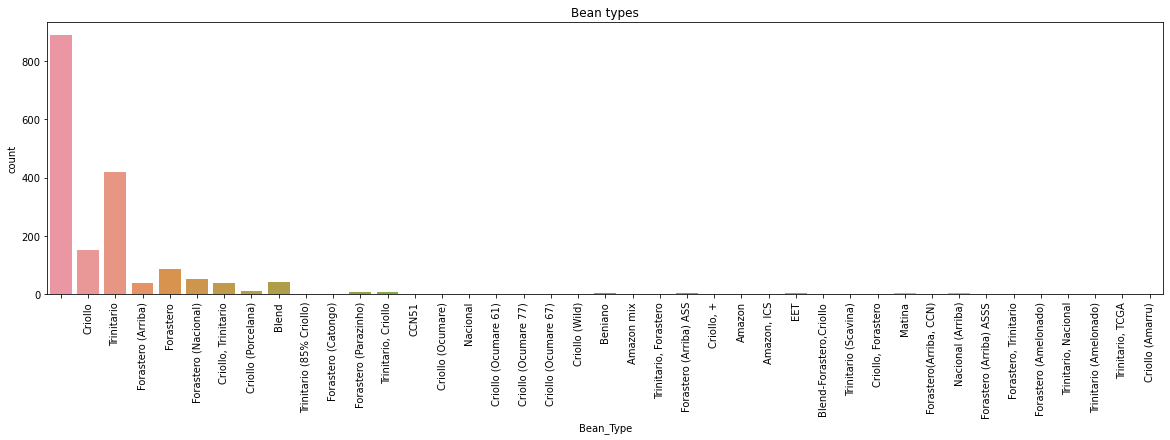

In [144]:
plt.figure(figsize=(20,5))
sns.countplot(choco_data.Bean_Type)
plt.xticks(rotation=90);
plt.title("Bean types");

# HR Employee Attrition Data

In [145]:
hr_df = pd.read_csv("../../data/HR-Employee-Attrition.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Heatmap

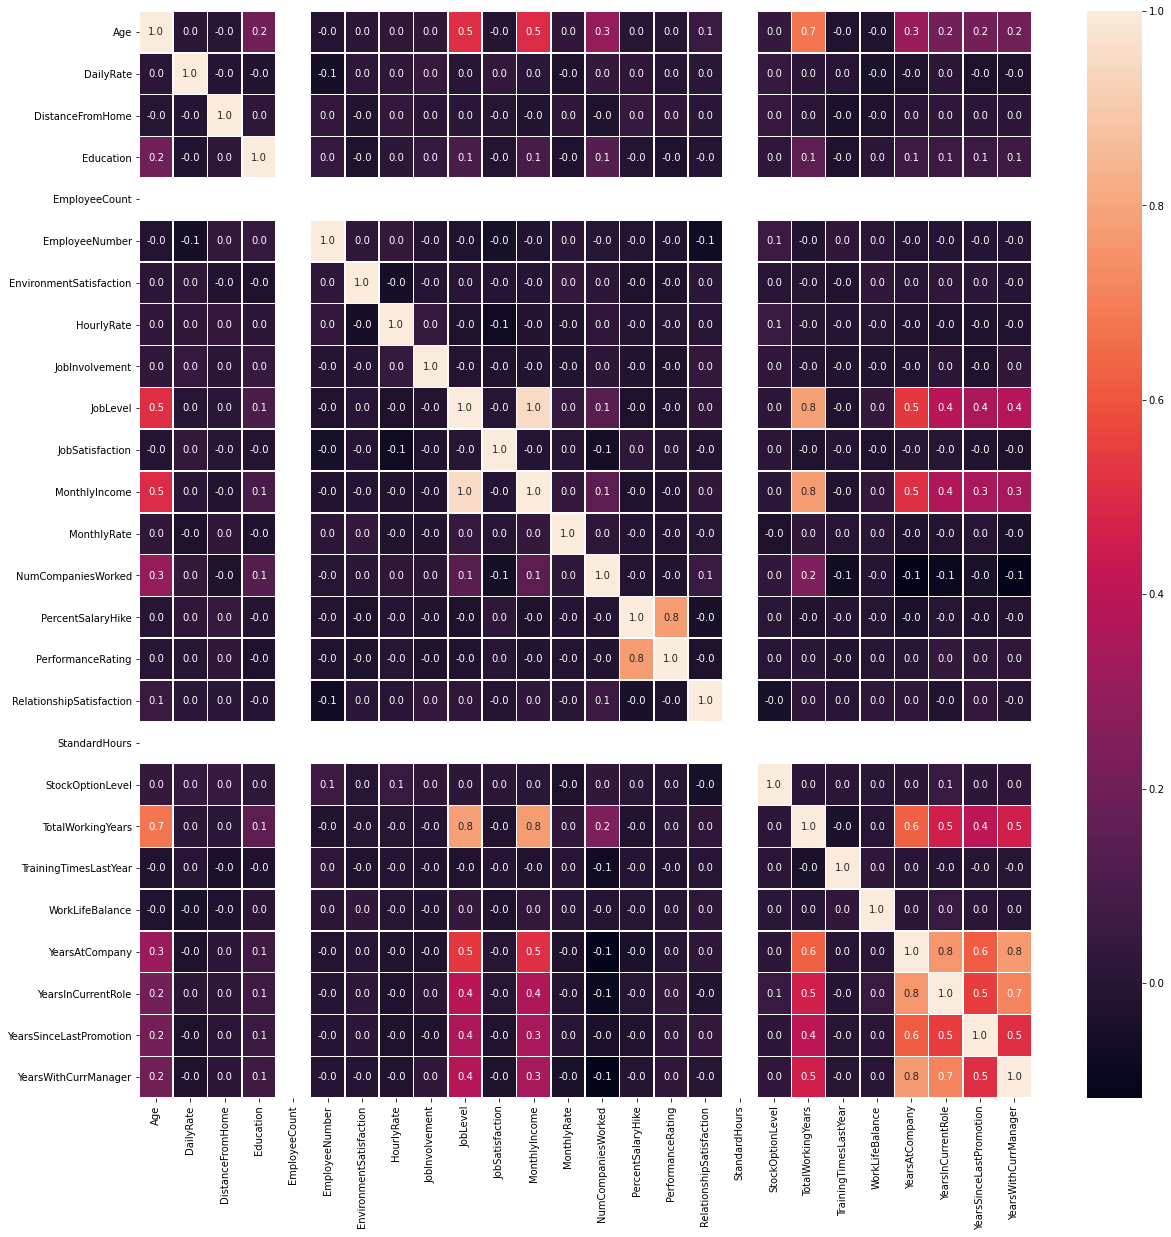

In [147]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(hr_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
# count of people doing overtime

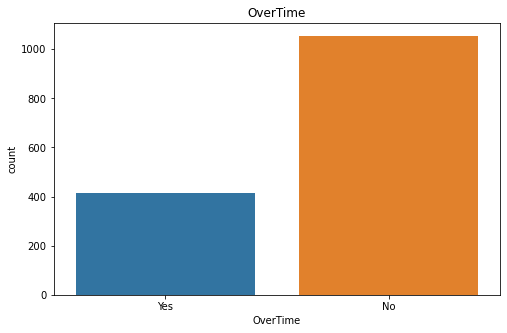

In [149]:
sns.countplot(hr_df['OverTime'])
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.title('OverTime');

# count of people based on their marital status

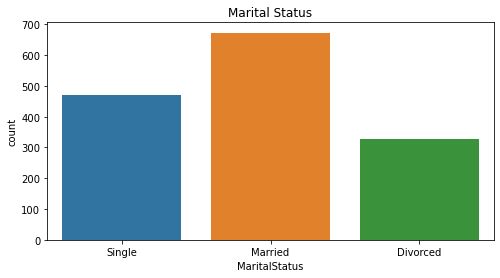

In [151]:
sns.countplot(hr_df['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.title('Marital Status')
plt.show()

# Count of people based on their Jobrole

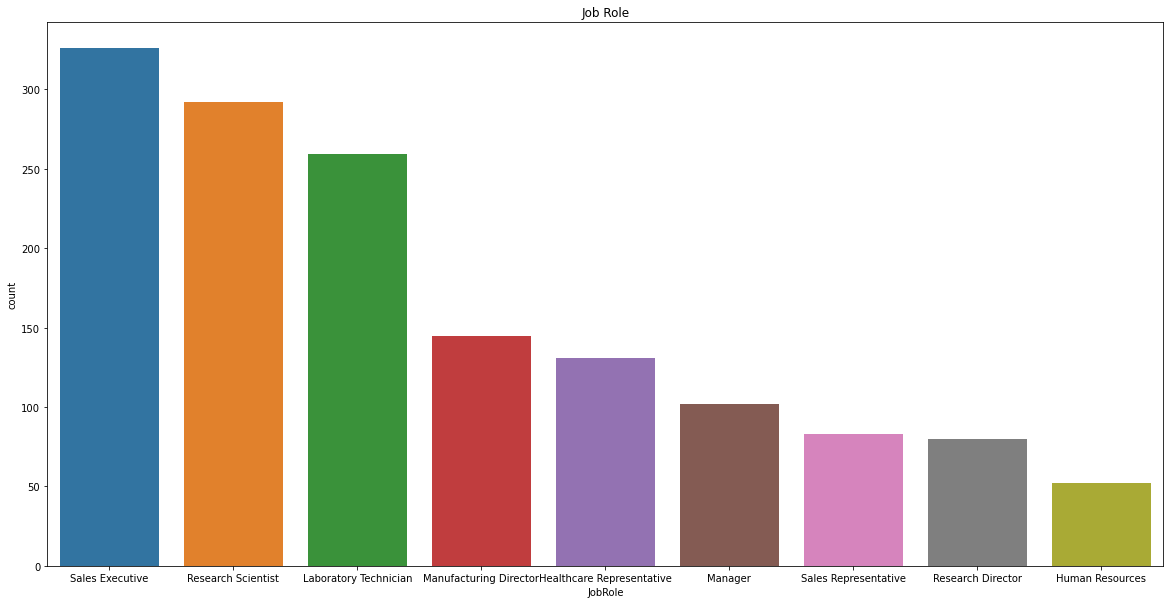

In [154]:
sns.countplot(hr_df['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Job Role')
plt.show()

# count of people based on their Gender

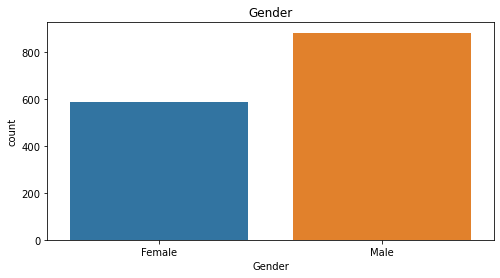

In [156]:
sns.countplot(hr_df['Gender'])
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.title('Gender');

# creating a pie chart for the gender variables

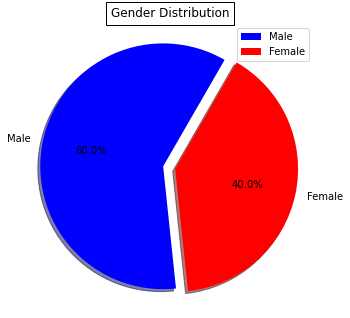

In [157]:
gender_val = ['Male','Female']
gender = hr_df['Gender'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor':'white','pad':5})
labels = 'Male','Female'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(gender ,explode =explode ,labels=labels ,colors =colors ,autopct = '%1.1f%%' ,shadow = True,startangle = 60)
plt.legend(labels = gender_val)
plt.axis('equal')
plt.show()

# count of people based on their field of education

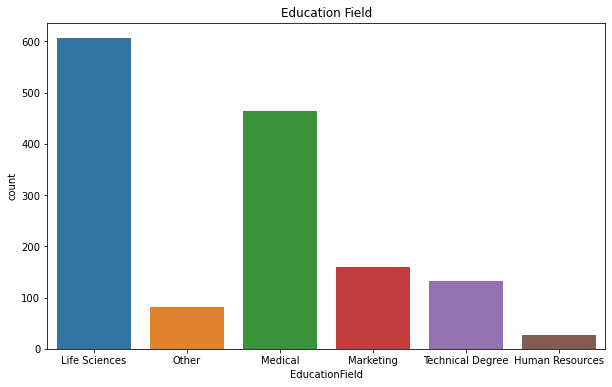

In [159]:
sns.countplot(hr_df['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Education Field')
plt.show()

# Count of people based on the department in which they work

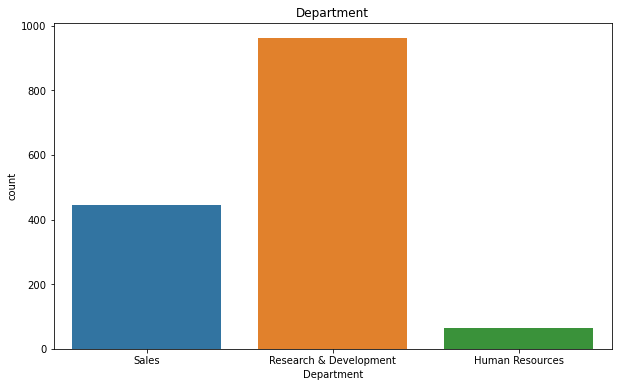

In [160]:
sns.countplot(hr_df['Department'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Department')
plt.show()

# Count of people based on their Travel Frequency

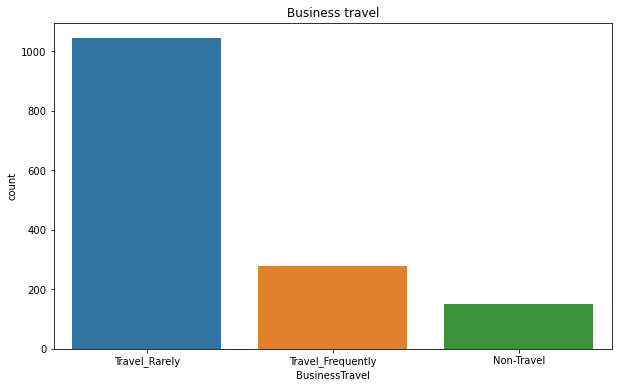

In [162]:
sns.countplot(hr_df['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Business travel');

# Analyzing the age group of the peole doing overtime

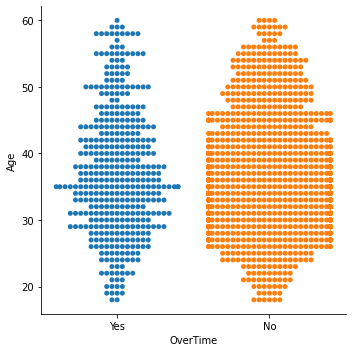

In [163]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=hr_df);

# Count of people based on their total working years

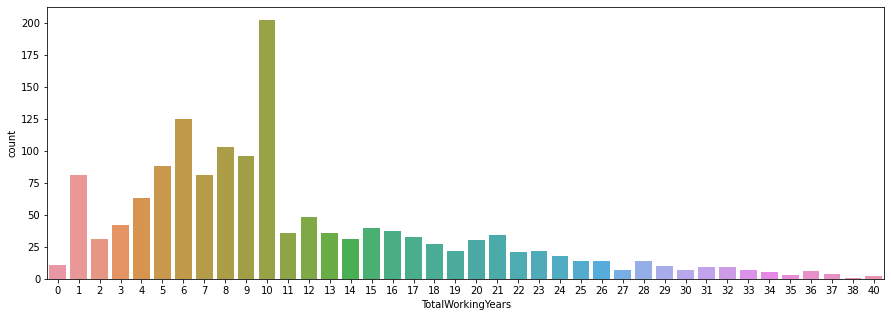

In [165]:
plt.subplots(figsize=(15,5))
sns.countplot(hr_df.TotalWorkingYears)
plt.show()

# Count of people based on their Education

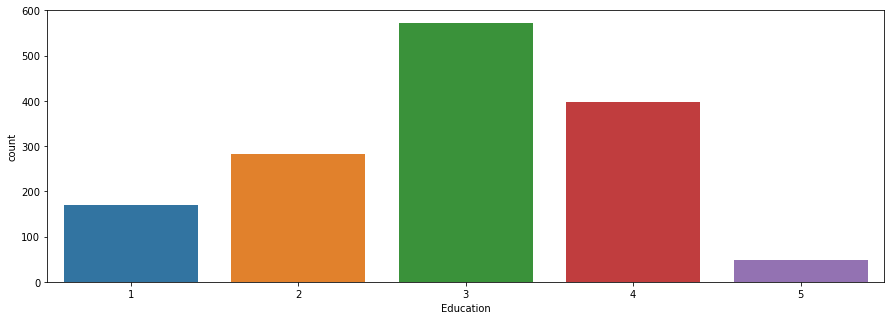

In [166]:
plt.subplots(figsize=(15,5))
sns.countplot(hr_df.Education)
plt.show()

# Count of people based on the number of companies they have worked for

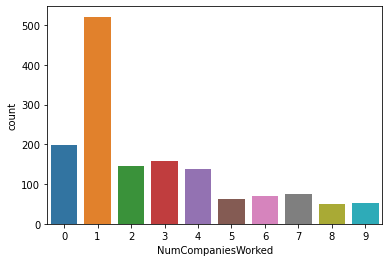

In [167]:
sns.countplot(hr_df.NumCompaniesWorked)
plt.show()

# Count of people based on the distance from home they are working

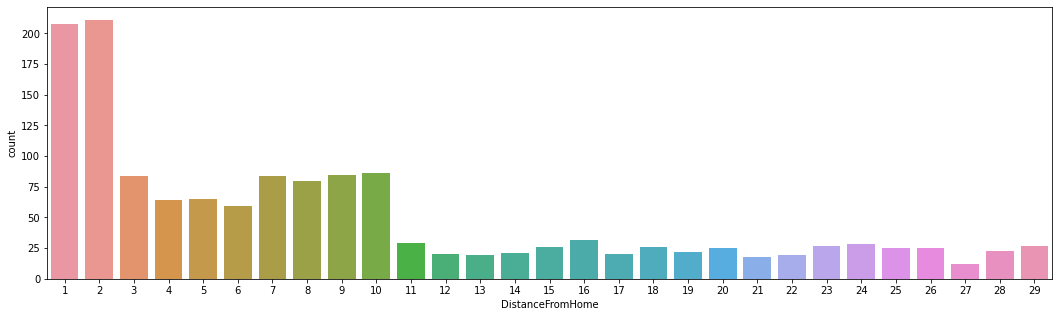

In [168]:
plt.subplots(figsize=(18,5))
sns.countplot(hr_df.DistanceFromHome)
plt.show()

# Income Data

In [186]:
income_data = pd.read_csv("../../data/incomeData.csv")
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Mean of Age of income data:  38.582
Median of Age of income data:  37.0


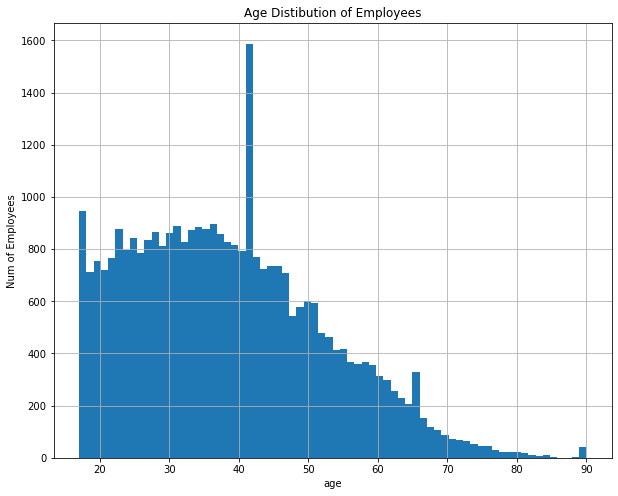

In [174]:
# Histogram for age
plt.figure(figsize=(10,8))
print("Mean of Age of income data: " ,income_data['age'].mean().round(3))
print("Median of Age of income data: " ,income_data['age'].median().round(3))

income_data['age'].hist(bins=70)
plt.title("Age Distibution of Employees")
plt.xlabel("age")
plt.ylabel("Num of Employees")
plt.show()

# Education 

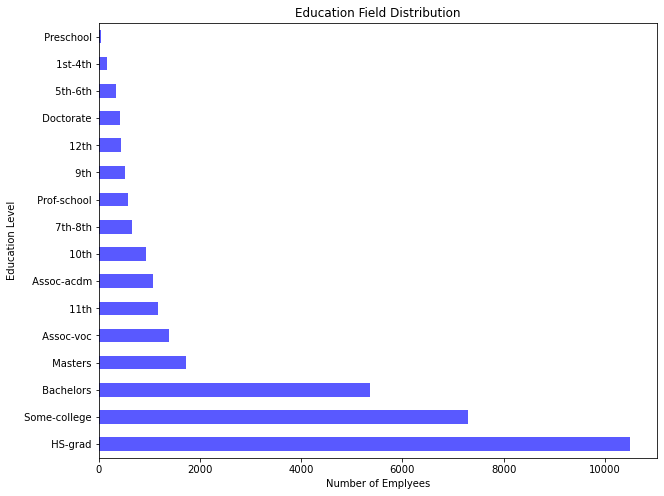

In [175]:
plt.figure(figsize=(10,8))
income_data['education'].value_counts().plot(kind='barh', color='blue',alpha=.65)
plt.title("Education Field Distribution")
plt.xlabel("Number of Emplyees")
plt.ylabel("Education Level")
plt.show()

# Marital Status

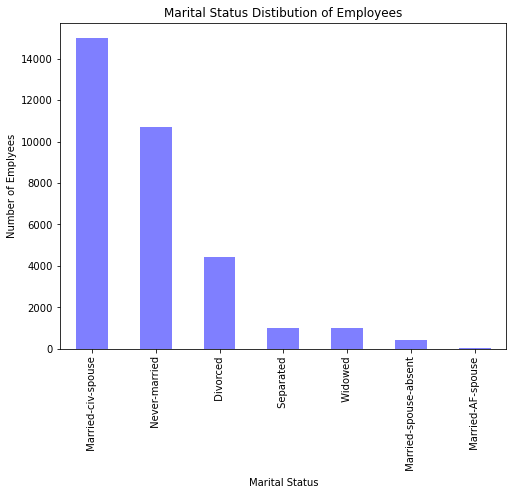

In [176]:
plt.figure(figsize=(8,6))
income_data['marital-status'].value_counts().plot(kind='bar', color='blue' , alpha=.5)
# plt.plot(kind='bar', color='b', alpha=.5)
plt.title("Marital Status Distibution of Employees")
plt.xlabel("Marital Status")
plt.ylabel("Number of Emplyees")
plt.show()

In [187]:
#labels
lab = income_data["sex"].value_counts().keys().tolist()
#values
val = income_data["sex"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Salary distribution between male and female

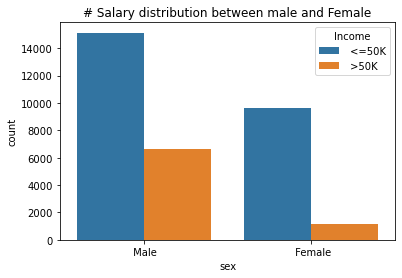

In [188]:
sns.countplot(x='sex' , hue = "Income" , data=income_data) 
plt.title("# Salary distribution between male and Female")
plt.show()

# Salary distribution of Incomes

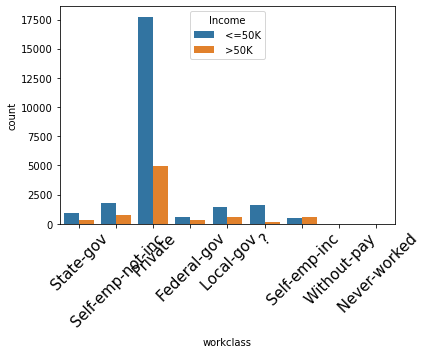

In [189]:
s = sns.countplot("workclass" , data= income_data , hue = 'Income')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

# Salary distribution based on Occupation

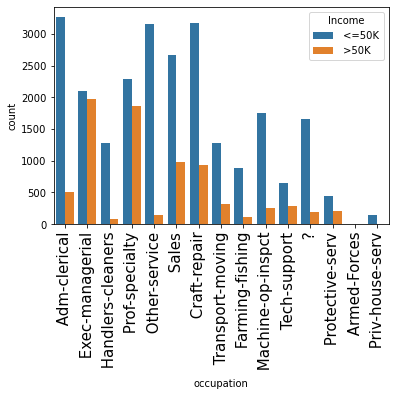

In [190]:
s = sns.countplot("occupation" , data= income_data , hue = 'Income')
s.set_xticklabels(s.get_xticklabels(), rotation = 'vertical' , fontsize = 15)
plt.show()

# Salary distribution based on education

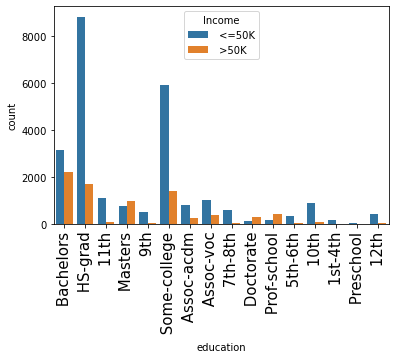

In [192]:
s = sns.countplot("education" , data= income_data , hue = 'Income')
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize = 15)
plt.show()

# Wage Class Distribution (Target)

In [193]:
lab = income_data['Income'].value_counts().keys().tolist()
#values
val = income_data["Income"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Wage class distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data_new = [trace]
fig = go.Figure(data = data_new,layout = layout)
py.iplot(fig)

# Age vs Income

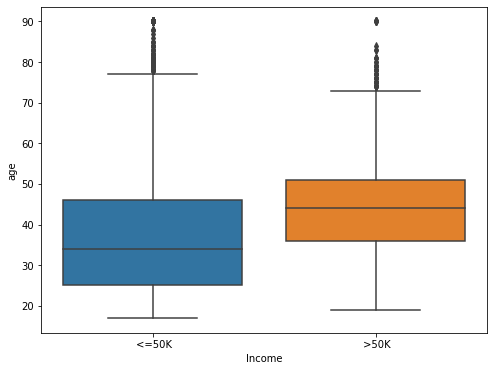

In [194]:
plt.figure(figsize = (8,6))
sns.boxplot(x='Income' , y = 'age' , data = income_data)
plt.show()

# Salary vs race

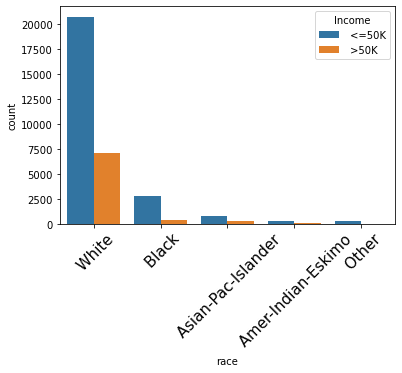

In [196]:
s = sns.countplot("race" , data= income_data , hue = 'Income')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

# Native-Country column

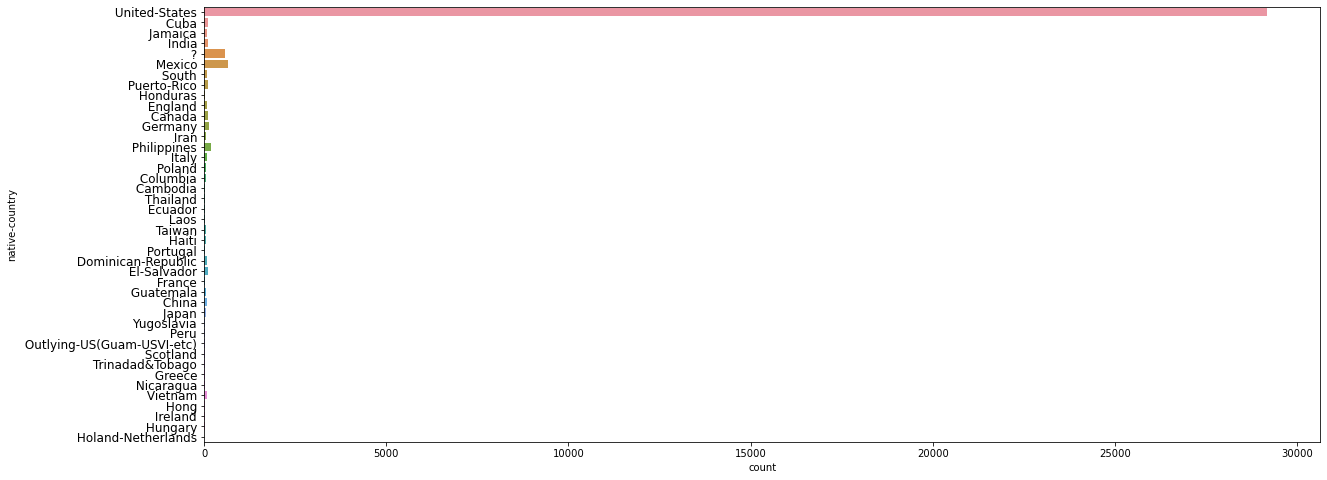

In [197]:
plt.figure(figsize=(20,8)) #Create a new figure
g = sns.countplot(y='native-country',data=income_data) # plotting the counts for native country

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) # Set the y-tick labels with list of strings labels.
plt.show()

# Countplot based on the Sex column

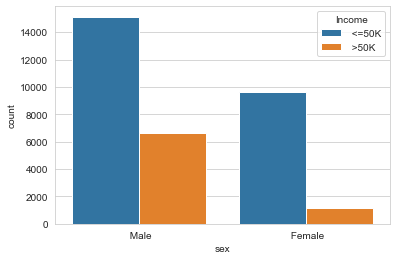

In [198]:
plt.figure(figsize=(40,20)) #Create a new figure
sns.set_style('whitegrid') #Use matplotlib style settings from a style specification.
%matplotlib inline
sns.countplot('sex',data=income_data,hue='Income') 
plt.show()

# Countplot based on the workclass column

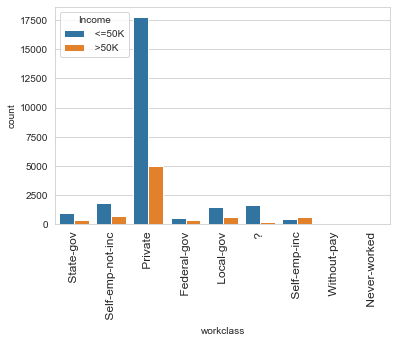

In [200]:
g = sns.countplot('workclass',data=income_data,hue='Income') 
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

# Countplot based on the Education vs Target column


In [203]:
income_data.columns[-1]

'Income'

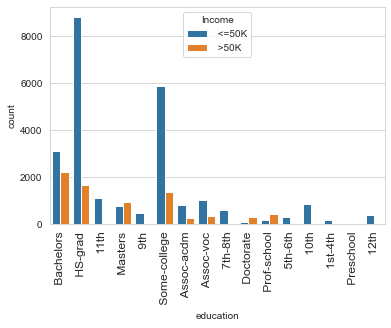

In [204]:
g = sns.countplot('education',data=income_data,hue='Income')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

# Countplot based on the Income column

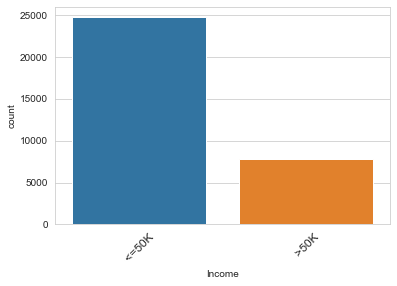

In [206]:
g = sns.countplot('Income',data=income_data) 
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

# Olympics Data - Seaborn Tutorials

In [2]:
pd.options.display.max_rows = 10
# pd.options.display.max_columns = 6
data2 = pd.read_csv("https://raw.githubusercontent.com/mojones/binders/master/olympics.csv", sep="\t")
data2.head()

,City,Year,Sport,...,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,...,Gold,Hungary,HUN
1,Athens,1896,Aquatics,...,Silver,Austria,AUT
2,Athens,1896,Aquatics,...,Bronze,Greece,GRE
3,Athens,1896,Aquatics,...,Gold,Greece,GRE
4,Athens,1896,Aquatics,...,Silver,Greece,GRE


# Cleaning jamed column names

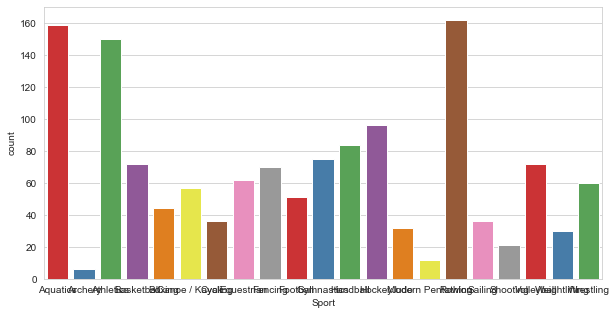

In [208]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data2[data2['Year'] == 1980],
    x='Sport',
    palette='Set1'
)

# After

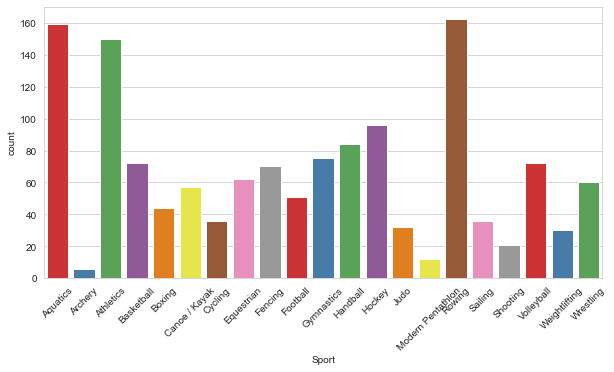

In [209]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data2[data2['Year'] == 1980],
    x='Sport',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

# Improving the alignment of the xlabels


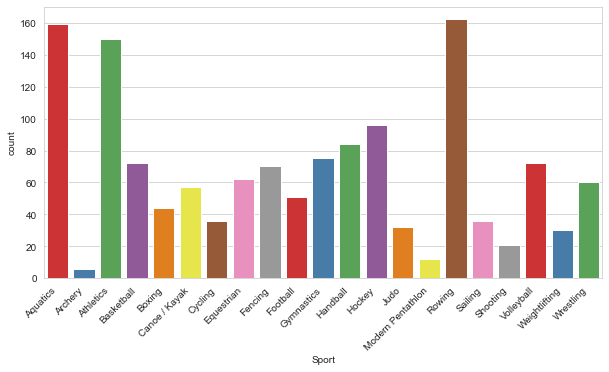

In [211]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data2[data2['Year'] == 1980],
    x='Sport',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# And just to show a few more things that we can do with set_xticklabels() we'll also set the font weight to be a bit lighter, and the font size to be a bit bigger:

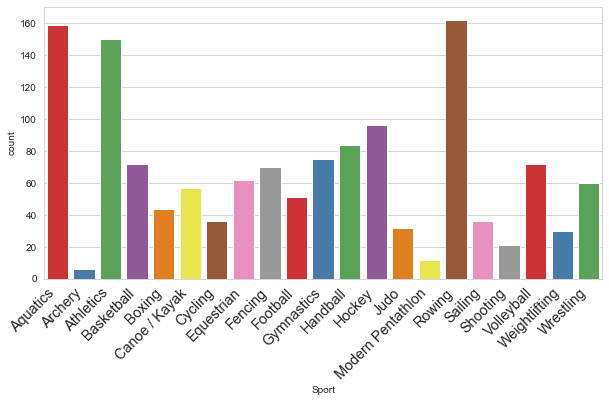

In [212]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data2[data2['Year'] == 1980],
    x='Sport',
    palette='Set1'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.show()


# &#9989; Note
In all of these examples, we've been using the object-oriented interface to matplotlib - notice that we're calling set_xticklabels() directly on the chart object.

Another object is to use the pyplot interface. There's a method simply called xticks() which we could use like this:

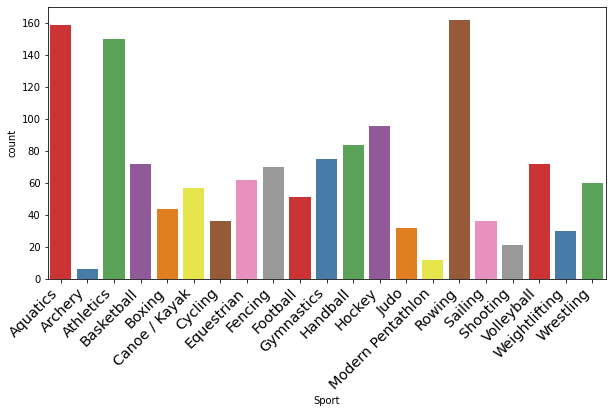

In [3]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data2[data2['Year'] == 1980],
    x='Sport',
    palette='Set1'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()


# Observation :
+ Notice that when we do it this way the list of labels is optional, so we don't need to call get_xticklabels().
Althought the pyplot interface is easier to use in this case, in general I find it clearer to use the object-oriented interface, as it tends to be more explicit.

# Now
+ Everything that we've seen above applies if we're using matplotlib directly instead of seaborn: once we have an Axes object, we can call set_xticklabels() on it. Let's do the same thing using pandas's built in plotting function:


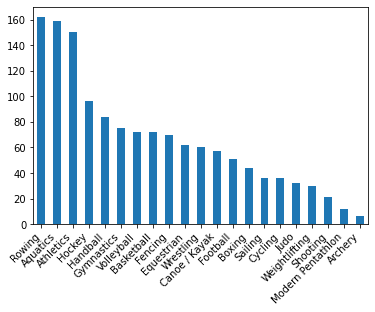

In [4]:
chart = data2[data2['Year'] == 1980]['Sport'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');


# Dealing with multiple plots¶
+ Let's try another plot. One of the great features of seaborn is that it makes it very easy to draw multiple plots. Let's see how the distribution of medals in each sport changed between 1980 and 2008:


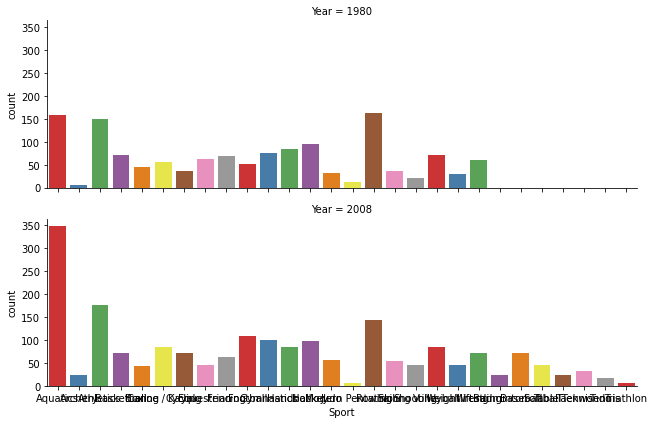

In [5]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    row='Year',
    aspect=3,
    height=3
);

# Observation:
+ As before, the labels need to be rotated. Let's try the approach that we used before:



AttributeError: 'FacetGrid' object has no attribute 'get_xticklabels'

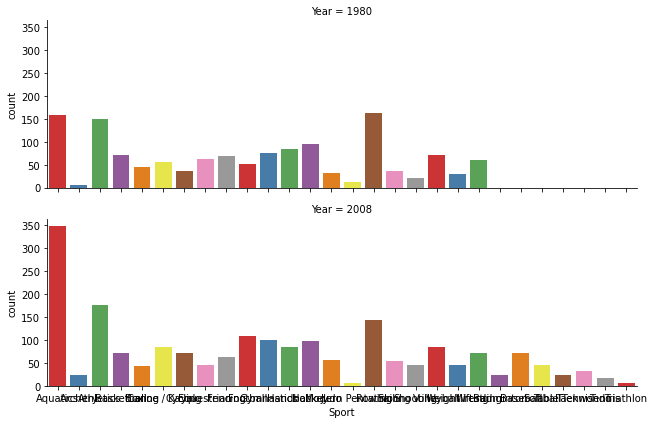

In [6]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    row='Year',
    aspect=3,
    height=3
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Error
+ We run into an error. Note that the missing attribute is not set_xticklabels() but get_xticklabels(). The reason why this approach worked for countplot() and not for factorplot() is that the output from countplot() is a single Axes object, as we saw above, but the output from factorplot() is a seaborn FacetGrid object:



In [7]:
# checking the type for chart
type(chart)

seaborn.axisgrid.FacetGrid

## whose job is to store a collection of multiple axes - two in this case. So how to rotate the labels? In the current stable version of seaborn (0.9.0 at the time of writing) just calling set_xticklabels() without a list of labels works for most cases, but not in the case we have here where we're using row=Year to get multiple plots. If we plot by columns it works fine:

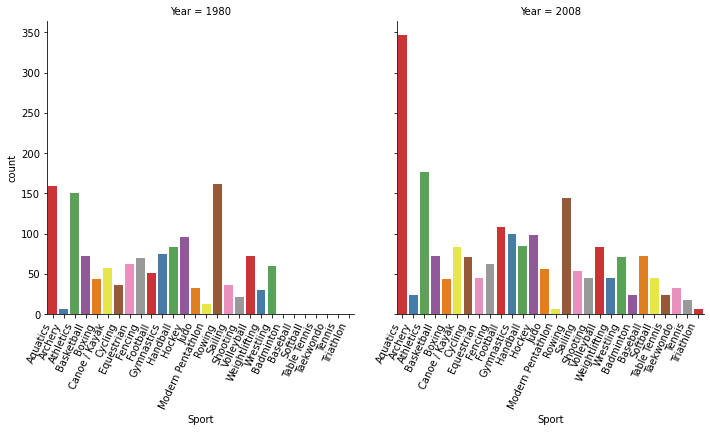

In [8]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    col='Year',
    aspect=1,
)
chart.set_xticklabels(rotation=65, horizontalalignment='right');

# But now : Observations:
+ but with rows, calling set_xticklabels() just makes the labels disappear:

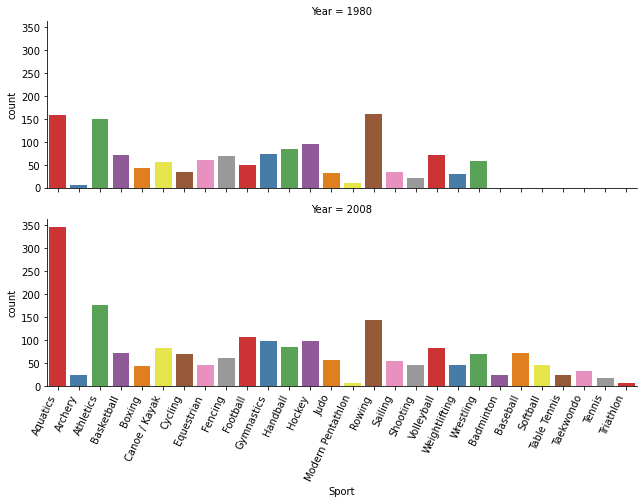

In [9]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    row='Year',
    aspect=3,
    height=3
)
chart.set_xticklabels(rotation=65, horizontalalignment='right');

# Now Or:¶
+ The correct thing to do in this case is either to iterate over the individual axes objects and call set_xticklabels() on them as we did earlier:

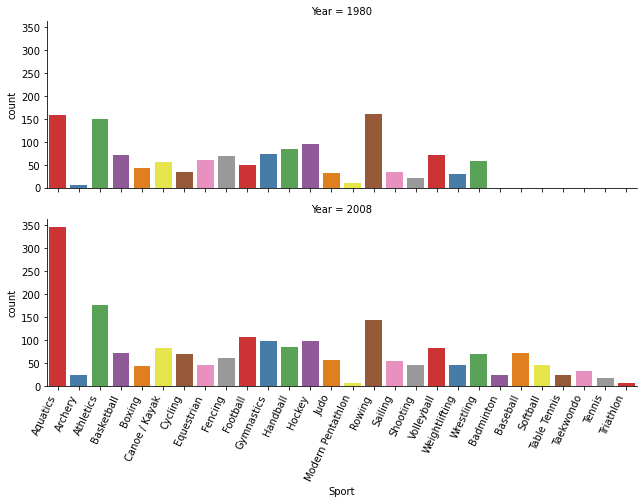

In [10]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    row='Year',
    aspect=3,
    height=3
)
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

# Or use the pyplot interface like we did earlier:

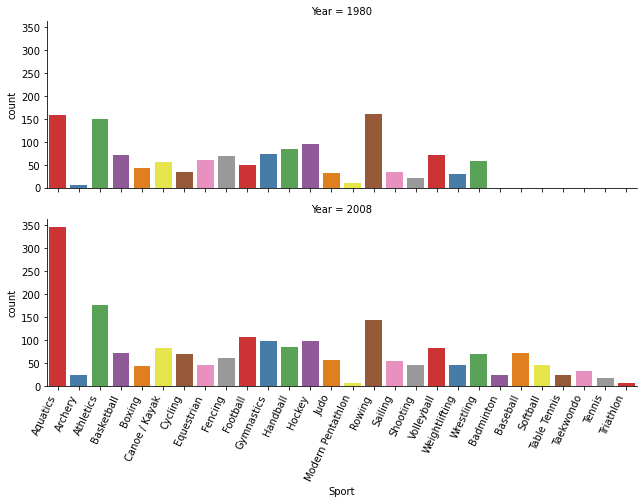

In [11]:
chart = sns.catplot(
    data=data2[data2['Year'].isin([1980, 2008])],
    x='Sport',
    kind='count',
    palette='Set1',
    row='Year',
    aspect=3,
    height=3
)
plt.xticks(rotation=65, horizontalalignment='right');

# Observation ;
+ This approach should work for any of the family of plots that come under the catplot() high-level function. Even pairplot() will give a PairGrid as its output, which behaves like a FacetGrid in that it has an axes.flat attribute that we can iterate over to call methods on each Axes object.

And, of course, everything that we've done here will work for y-axis labels as well - we typically don't need to change their rotation, but we might want to set their other properties. As an example, let's count how many medals were won at each Olypmic games for each country in each year. To keep the dataset managable, we'll just look at countries that have won more than 500 metals in total:

In [15]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = None


In [4]:
heart_df = pd.read_csv("../../data/heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
print("Heart data has :" , heart_df.shape[0] ,"rows and" , heart_df.shape[1],  "columns.")

Heart data has : 303 rows and 14 columns.


In [23]:
# let's look at the target columns
heart_df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

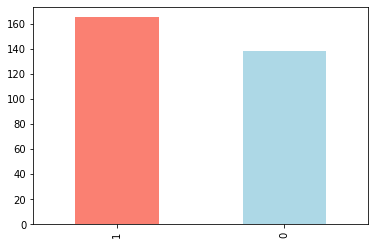

In [24]:
# Let's visualise our target variable
heart_df["target"].value_counts().plot(kind="bar", color=['salmon','lightblue']);

In [25]:
# Sex 
heart_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

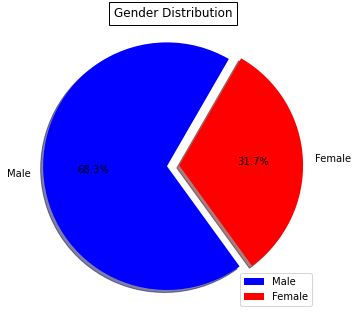

In [26]:
gender_val = ['Male','Female']
gender = heart_df['sex'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor':'white','pad':5})
labels = 'Male','Female'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(gender ,explode =explode ,labels=labels ,colors =colors ,autopct = '%1.1f%%' ,shadow = True,startangle = 60)
plt.legend(labels = gender_val)
plt.axis('equal')
plt.show()

# Sex vs Target

''

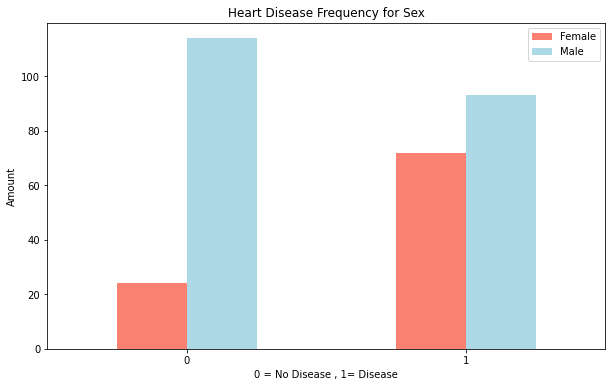

In [29]:
# create a plot of crosstab
pd.crosstab(heart_df.target, heart_df.sex).plot(kind="bar", 
                                    figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
;

# Age vs MaxHeart rate for Heart disease¶


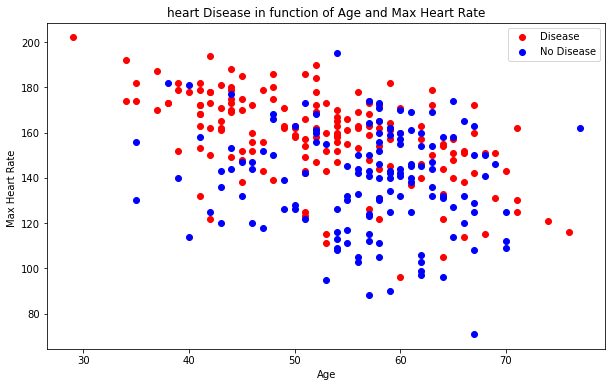

In [30]:
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(heart_df.age[heart_df.target==1],
           heart_df.thalach[heart_df.target==1],
           c='red')

# scatter with negative examples
plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.thalach[heart_df.target==0],
           c='blue')

plt.title("heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate ")
plt.legend(["Disease","No Disease"])
plt.show()

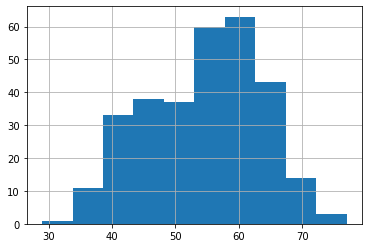

In [26]:
# Check the distribution of Age with a histogram
heart_df.age.hist()
plt.show()

# Heart disease Frequency per Chest pain Cp vs target
+ Typical angina: chest pain realtd decrease blood supply to the heart
+ Atypical angina: chest pain not related to heart
+ Non-anginal pain: typically esophageal spasms(no-heart related)
+ Asymptomatic: chest pain not showing signs of disease

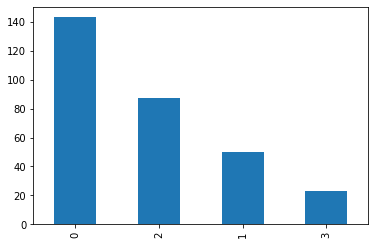

In [28]:
heart_df.cp.value_counts().plot(kind='bar');

In [30]:
pd.crosstab(heart_df.cp, heart_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


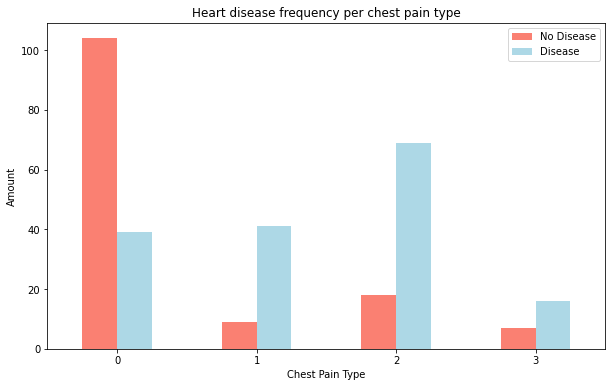

In [31]:
# Make visualisation
pd.crosstab(heart_df.cp, heart_df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);


# Finding the correlation between variables

In [32]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Heatmap

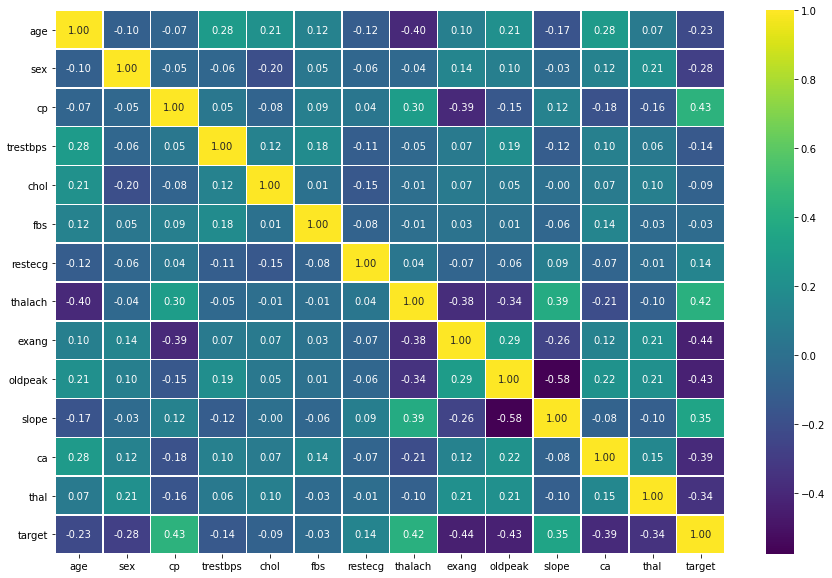

In [33]:
corr_matrix = heart_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="viridis");
# this is for older versions where the heatmap isnt full at the top and bottom
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5 , top - 0.5)

# White Wine data

In [34]:
import missingno as msno

In [37]:
# Reading the data
wine_data = pd.read_csv('../../data/winequality-white.csv', sep = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


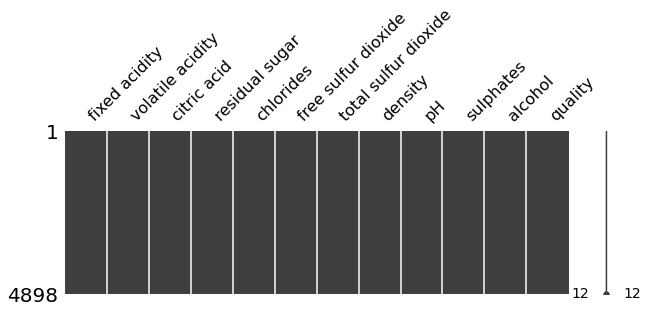

In [39]:
# Missing data detection
msno.matrix(wine_data,figsize=(10,3));

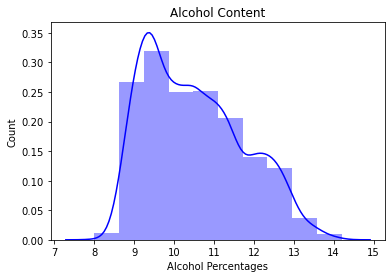

In [58]:
# Alcohol Distribution plot
sns.distplot(wine_data["alcohol"], bins=10 , kde=True, color="blue")
plt.xlabel("Alcohol Percentages")
plt.ylabel("Count")
plt.title("Alcohol Content")
plt.show()

# Check relationship between variables

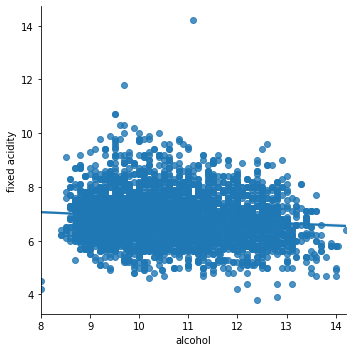

In [60]:
sns.lmplot(x="alcohol", y="fixed acidity", data=wine_data);

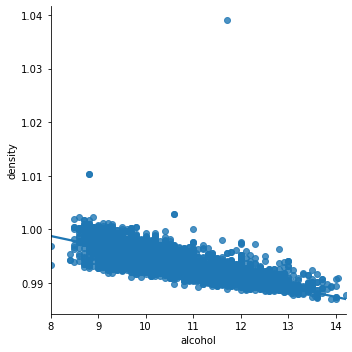

In [61]:
sns.lmplot(x="alcohol", y="density", data=wine_data);

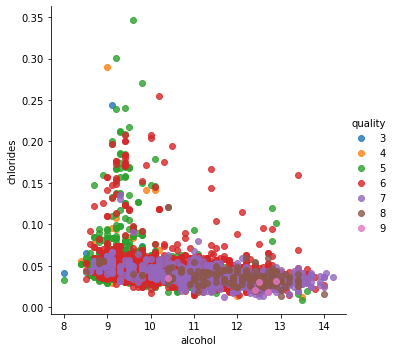

In [64]:
sns.lmplot(x="alcohol", y="chlorides", data=wine_data , fit_reg=False,
          hue="quality");

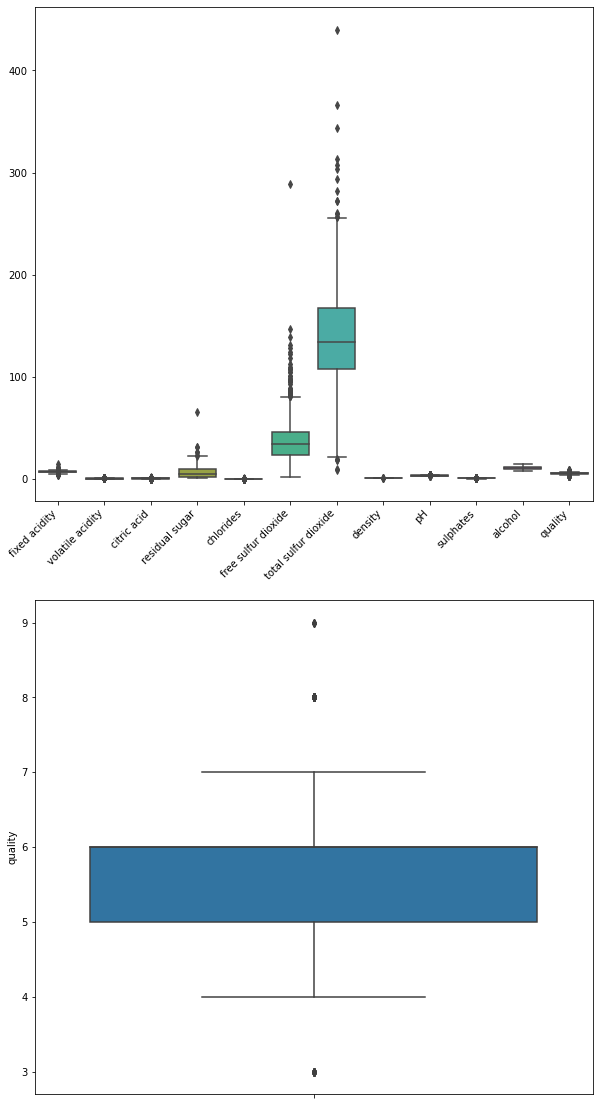

In [86]:
# Distribution
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10, 20)
ax1 = sns.boxplot(data=wine_data,orient="v",ax=axes[0])
ax2 = sns.boxplot(data=wine_data,y="quality",orient="pH",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45 ,horizontalalignment='right') # arranges the axes so they dont look crumped together
;

# Correlation analysis

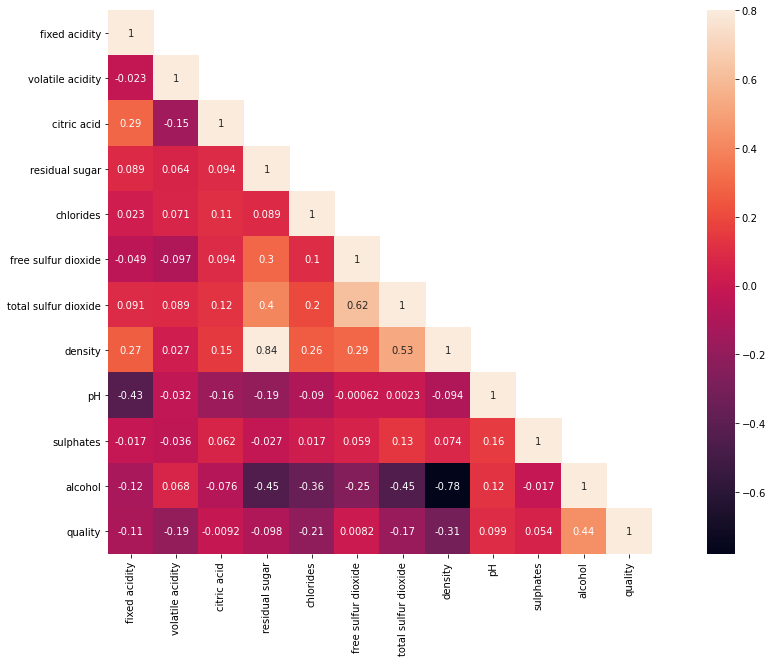

In [46]:
corrMatt = wine_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True);

# Scatter plot

In [ ]:
mx_plot = sn.pairplot(wine_data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])

# Wine Data - Red and White wine

In [70]:
wines = pd.read_csv("redAndwhitewine.csv")
wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Distribution plot for Alcohol

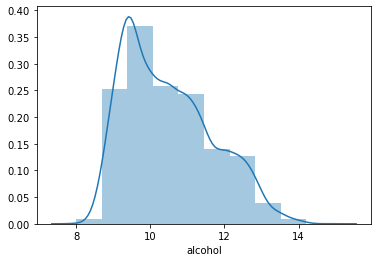

In [72]:
sns.distplot(wines.alcohol , bins=10 , kde=True);

# linear relationship btwn alchohol and fixed acidity

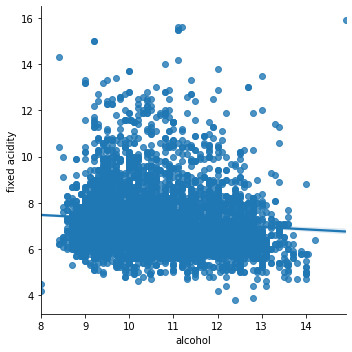

In [82]:
sns.lmplot(x="alcohol", y="fixed acidity", data=wines);

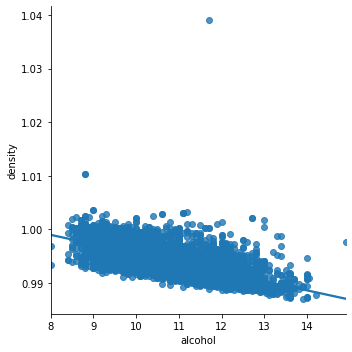

In [81]:
sns.lmplot(x="alcohol", y="density", data=wines);

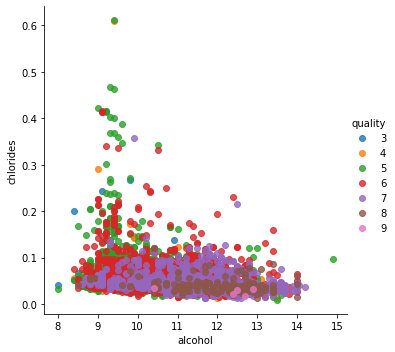

In [80]:
sns.lmplot(x="alcohol", y="chlorides", data=wines , fit_reg=False,
          hue="quality");

# alcohol and chlorides for types of wine
+ we can see from the below that red wine has more chlorides content

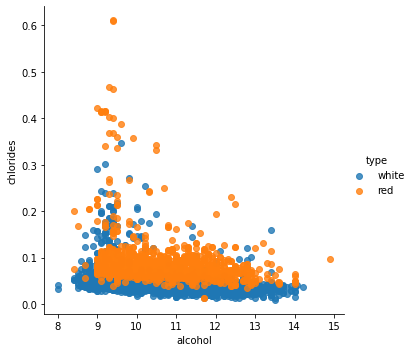

In [79]:
sns.lmplot(x="alcohol", y="chlorides", data=wines , fit_reg=False,
          hue="type");

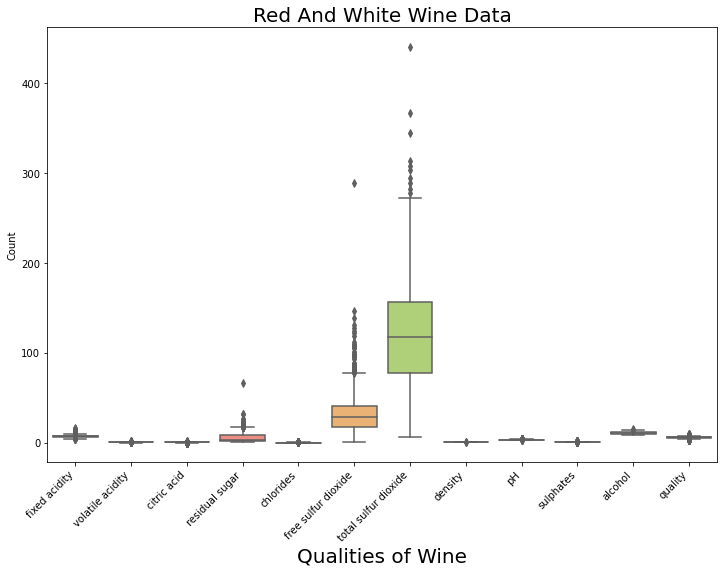

In [88]:
plt.figure(figsize=(12,8))
chart = sns.boxplot(data=wines, palette="Set3")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45 ,horizontalalignment='right');
plt.title("Red And White Wine Data" , fontsize=20)
plt.xlabel("Qualities of Wine" , fontsize=20)
plt.ylabel("Count")
plt.show()

In [ ]:
# Voilin PLots

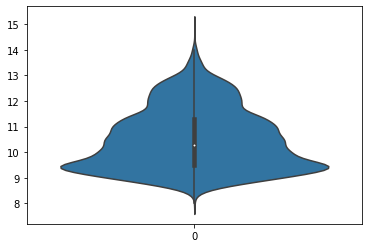

In [91]:
sns.violinplot(data=wines["alcohol"]);

# Quality vs Type of wine

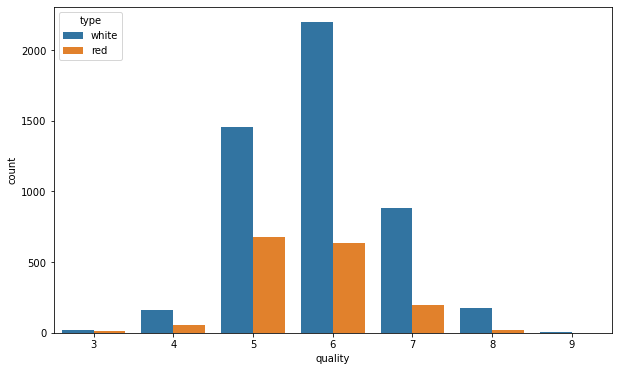

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x="quality", data=wines , hue="type");

# Whole-sale data


In [47]:
wholesale_data = pd.read_csv("../../data/wholesale_customers.csv")
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
# Drop columns
wholesale_data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [49]:
# Display the data
wholesale_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [50]:
wholesale_data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [51]:
# renaming columns
wholesale_data.rename(columns={"Detergents_Paper":"Detergents"},  inplace=True)

# Data distribution

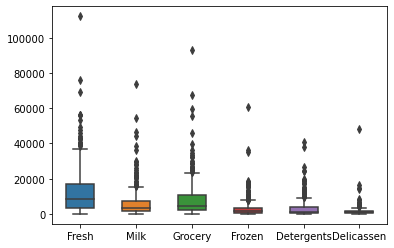

In [53]:
sns.boxplot(data=wholesale_data, orient="v",width=0.5 )
plt.show()

# Correlation analasys


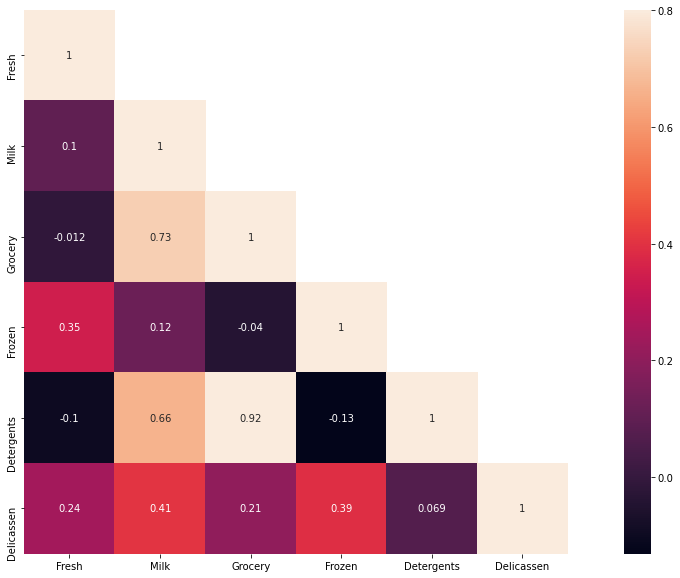

In [54]:
corrMatt = wholesale_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True);

# Scatterplot

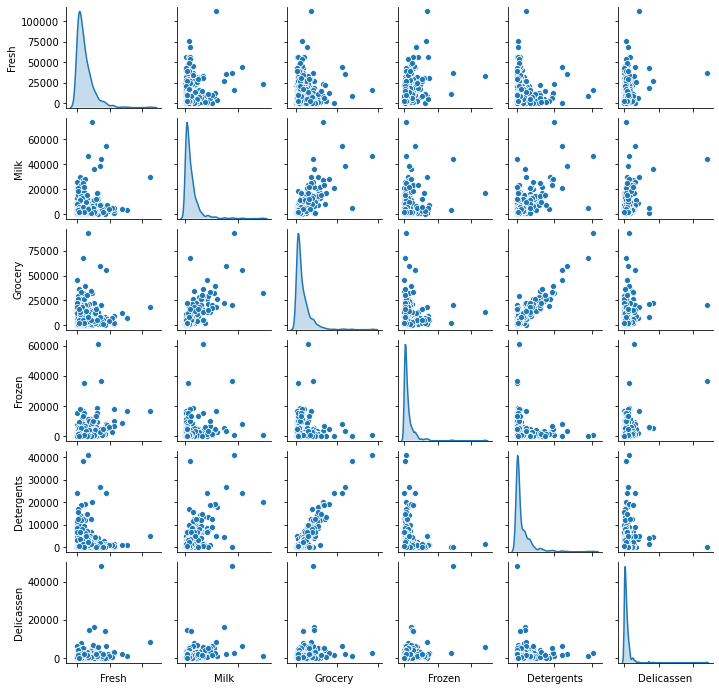

In [55]:
mx_plot = sns.pairplot(wholesale_data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])
plt.show()

# Airbnb data

In [95]:
house = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-10-13/data/listings.csv.gz")
house.head()                    

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201013023834,2020-10-20,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.49
1,13913,https://www.airbnb.com/rooms/13913,20201013023834,2020-10-20,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3,1,2,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201013023834,2020-10-20,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.67
3,17402,https://www.airbnb.com/rooms/17402,20201013023834,2020-10-17,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,15,15,0,0,0.36
4,17506,https://www.airbnb.com/rooms/17506,20201013023834,2020-10-16,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
